In [1]:
import time
start = time.time()

In [2]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import cv2
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.metrics
from keras.models import Sequential
from keras.layers import Flatten, MaxPooling2D, Conv2D, Dense, Conv3D
from keras import backend as K

In [4]:
# input_folder = '/content/drive/MyDrive/Micro_Organism/'
# splitfolders.ratio(input_folder, output="/content/drive/MyDrive/Micro_Organism/SplitImages", 
#                     seed=42, ratio=(.7, .2, .1), 
#                     group_prefix=None)
# # For split data  || 70% train data, 20% test data and 10% val data

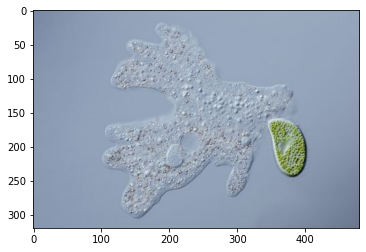

In [5]:
img_array = cv2.imread('/content/drive/MyDrive/Micro_Organism/SplitImages/train/Amoeba/Image_1.jpg')
img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.show()
# For test color 

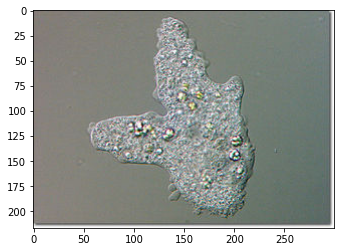

In [6]:
data = '/content/drive/MyDrive/Micro_Organism/SplitImages/train'
categories = ['Amoeba','Euglena','Hydra','Paramecium','Rod_bacteria','Spherical_bacteria','Spiral_bacteria','Yeast']
# For test our create_data function will be work
for ct in categories:
  path = os.path.join(data,ct)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break

In [7]:
print(img_array.shape)

(217, 300, 3)


In [8]:
IMG_Size = 300

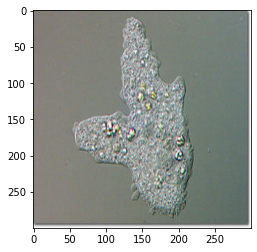

In [9]:
new_array = cv2.resize(img_array, (IMG_Size,IMG_Size))
plt.imshow(new_array)
plt.show()

In [10]:
training_data = []
val_data = []
test_data = []
def create_data(my_data_path,my_data):
    for ct in categories:
      path = os.path.join(my_data_path,ct)
      class_num = categories.index(ct)
      for img in os.listdir(path):
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
        generator = datagen.flow_from_directory(my_data_path,shuffle=True)
        try:
          img_array = cv2.imread(os.path.join(path,img))
          # img_array = img_array / 255
          img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
          new_array = cv2.resize(img_array, (IMG_Size,IMG_Size))
          my_data.append([new_array,class_num])
        except Exception as e:
          pass

In [11]:
train_data_path = '/content/drive/MyDrive/Micro_Organism/SplitImages/train'
test_data_path = '/content/drive/MyDrive/Micro_Organism/SplitImages/test'
val_data_path = '/content/drive/MyDrive/Micro_Organism/SplitImages/val'
create_data(train_data_path,training_data)
create_data(val_data_path,val_data)
create_data(test_data_path,test_data)

Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images belonging to 8 classes.
Found 549 images

In [12]:
x = []
y = []

In [13]:
for features, label in training_data:
  x.append(features)
  y.append(label)

In [14]:
x_test = []
y_test = []

for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

In [15]:
x_val = []
y_val = []

for features, label in val_data:
  x_val.append(features)
  y_val.append(label)

In [16]:
y = np.array(y)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [17]:
x = np.array(x).reshape(-1, IMG_Size, IMG_Size, 3) # If you are using grayscale you should type 1 instead of 3

In [18]:
x_test = np.array(x_test).reshape(-1, IMG_Size, IMG_Size, 3)

In [19]:
x_val = np.array(x_val).reshape(-1, IMG_Size, IMG_Size, 3)

In [22]:
# Model Creating

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(300, 300, 3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy', # binary_crossentropy, sparse_categorical_crossentropy, categorial_crossentropy
    optimizer=opt,
    run_eagerly=True,
    metrics=['accuracy']
)

hist = model.fit(x, y, validation_data=(x_val,y_val), verbose=2, epochs=50)

Epoch 1/50
18/18 - 278s - loss: 1123.7594 - accuracy: 0.1184 - val_loss: 2.1573 - val_accuracy: 0.1026 - 278s/epoch - 15s/step
Epoch 2/50
18/18 - 272s - loss: 2.0245 - accuracy: 0.2259 - val_loss: 2.0759 - val_accuracy: 0.1859 - 272s/epoch - 15s/step
Epoch 3/50
18/18 - 274s - loss: 1.9823 - accuracy: 0.2951 - val_loss: 2.2853 - val_accuracy: 0.1923 - 274s/epoch - 15s/step
Epoch 4/50
18/18 - 269s - loss: 1.8696 - accuracy: 0.3297 - val_loss: 2.2420 - val_accuracy: 0.1923 - 269s/epoch - 15s/step
Epoch 5/50
18/18 - 298s - loss: 1.8117 - accuracy: 0.3843 - val_loss: 2.8291 - val_accuracy: 0.1859 - 298s/epoch - 17s/step
Epoch 6/50
18/18 - 271s - loss: 1.7506 - accuracy: 0.3916 - val_loss: 2.1954 - val_accuracy: 0.1923 - 271s/epoch - 15s/step
Epoch 7/50
18/18 - 279s - loss: 1.5827 - accuracy: 0.4281 - val_loss: 3.0777 - val_accuracy: 0.2179 - 279s/epoch - 16s/step
Epoch 8/50
18/18 - 272s - loss: 1.9492 - accuracy: 0.4171 - val_loss: 2.1130 - val_accuracy: 0.1795 - 272s/epoch - 15s/step
Epoch

In [64]:
hist.history??

In [24]:
# hist.history ?? ---> Use -??- for help

In [52]:
acc = hist.history['accuracy']
max(acc)

0.9617486596107483

In [73]:
def visualization(name,h,color):
  t = h.history[name]
  my_max = max(t)
  my_min = min(t)
  print(f'Name : {name} max : {my_max} min : {my_min}')
  plt.plot(t,color=color,linewidth=3.0)
  plt.title(name)
  plt.ylabel(name)
  plt.xlabel('Epoch')
  plt.legend([name],loc='upper left')
  plt.show()

Name : accuracy max : 0.9617486596107483 min : 0.11839708685874939


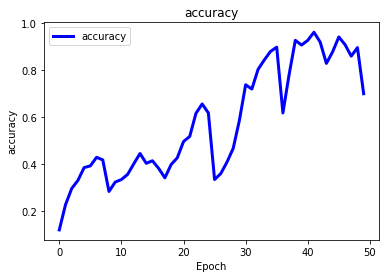

Name : loss max : 1123.7593994140625 min : 0.1440955549478531


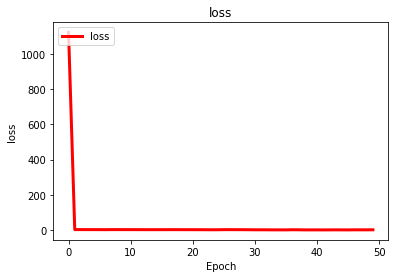

Name : val_accuracy max : 0.2628205120563507 min : 0.10256410390138626


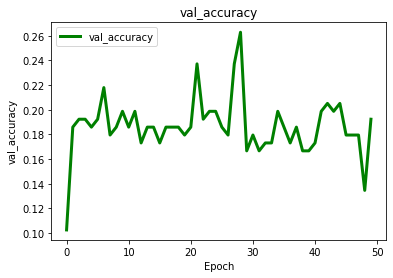

Name : val_loss max : 27.430757522583008 min : 2.0759074687957764


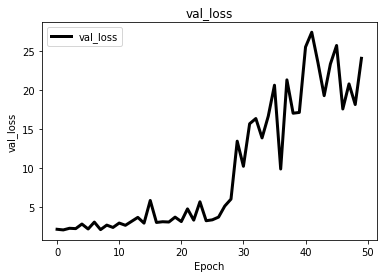

In [68]:
visualization('accuracy',hist,'Blue')
visualization('loss',hist,'Red')
visualization('val_accuracy',hist,'Green')
visualization('val_loss',hist,'Black')

In [27]:
res = model.evaluate(x_test, y_test)
print("test loss, test acc:", res)

3/3 [==============================] - 10s 3s/step - loss: 39.1115 - accuracy: 0.1667
test loss, test acc: [39.111534118652344, 0.1666666716337204]


In [71]:
model1 = Sequential()

model1.add(Flatten(input_shape=(300, 300, 3)))

model1.add(Dense(units=256,activation='relu'))

model1.add(Dense(units=256,activation='relu'))

model1.add(Dense(units=8,activation='softmax'))

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

hist1 = model1.fit(x,y,validation_data=(x_val,y_val), epochs=25, verbose=2)


Epoch 1/25
18/18 - 8s - loss: 47035.4883 - accuracy: 0.1220 - val_loss: 22439.0703 - val_accuracy: 0.1923 - 8s/epoch - 460ms/step
Epoch 2/25
18/18 - 7s - loss: 13048.3955 - accuracy: 0.1730 - val_loss: 14125.7324 - val_accuracy: 0.1859 - 7s/epoch - 408ms/step
Epoch 3/25
18/18 - 7s - loss: 11693.5977 - accuracy: 0.1330 - val_loss: 8886.3838 - val_accuracy: 0.0962 - 7s/epoch - 407ms/step
Epoch 4/25
18/18 - 7s - loss: 8943.6787 - accuracy: 0.1785 - val_loss: 8381.9004 - val_accuracy: 0.1026 - 7s/epoch - 409ms/step
Epoch 5/25
18/18 - 7s - loss: 5284.0732 - accuracy: 0.1494 - val_loss: 6361.8896 - val_accuracy: 0.1154 - 7s/epoch - 411ms/step
Epoch 6/25
18/18 - 7s - loss: 5010.2197 - accuracy: 0.2022 - val_loss: 2756.6897 - val_accuracy: 0.1987 - 7s/epoch - 409ms/step
Epoch 7/25
18/18 - 7s - loss: 1720.3639 - accuracy: 0.2095 - val_loss: 2017.0404 - val_accuracy: 0.1923 - 7s/epoch - 409ms/step
Epoch 8/25
18/18 - 7s - loss: 1009.8175 - accuracy: 0.3060 - val_loss: 1139.5677 - val_accuracy: 0.

Name : accuracy max : 0.32422587275505066 min : 0.12204007059335709


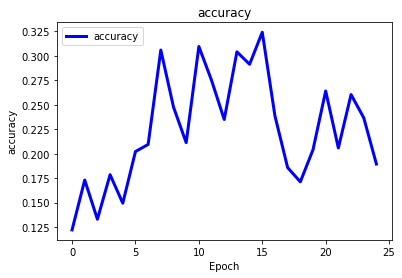

Name : loss max : 47035.48828125 min : 22.30510902404785


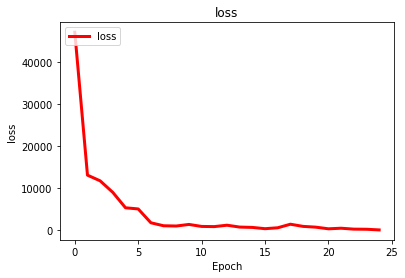

Name : val_accuracy max : 0.25 min : 0.09615384787321091


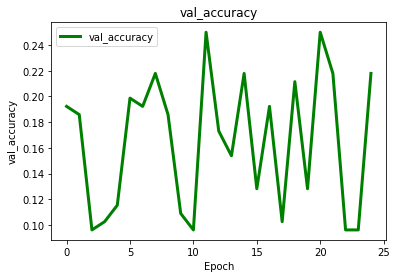

Name : val_loss max : 22439.0703125 min : 4.33244514465332


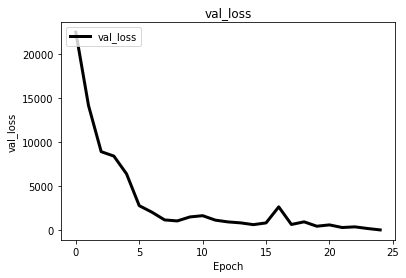

In [74]:
visualization('accuracy',hist1,'Blue')
visualization('loss',hist1,'Red')
visualization('val_accuracy',hist1,'Green')
visualization('val_loss',hist1,'Black')

In [75]:
res = model1.evaluate(x_test, y_test)
print("test loss, test acc:", res)

3/3 [==============================] - 0s 105ms/step - loss: 2.1047 - accuracy: 0.2143
test loss, test acc: [2.1047019958496094, 0.2142857164144516]


In [76]:
newpath = r'/content/drive/MyDrive/Micro_Organism/Model' 
if not os.path.exists(newpath):
    os.makedirs(newpath)


In [77]:
import pickle
# To save model  || You can use tensorflow model.save
pickle_out = open('/content/drive/MyDrive/Micro_Organism/Model/model.pickle','wb')
pickle.dump(model,pickle_out)
pickle_out.close()
pickle_out1 = open('/content/drive/MyDrive/Micro_Organism/Model/model1.pickle','wb')
pickle.dump(model1,pickle_out1)
pickle_out1.close()

In [78]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 645248)            0

In [79]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 270000)            0         
                                                                 
 dense_23 (Dense)            (None, 256)               69120256  
                                                                 
 dense_24 (Dense)            (None, 256)               65792     
                                                                 
 dense_25 (Dense)            (None, 8)                 2056      
                                                                 
Total params: 69,188,104
Trainable params: 69,188,104
Non-trainable params: 0
_________________________________________________________________


In [80]:
end = time.time()
print((end - start)/60)

315.27953653732936


In [81]:
# For load model
pickle_in = open('/content/drive/MyDrive/Micro_Organism/Model/model.pickle','rb')
model = pickle.load(pickle_in)